In [122]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, make_scorer, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from ucimlrepo import fetch_ucirepo 
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import precision_recall_fscore_support
from scipy.stats import randint, uniform

# fetch dataset 
# predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
# variable information 
# print(predict_students_dropout_and_academic_success.variables) 

In [93]:
df=pd.read_csv('Resources/data.csv',delimiter=';')
df['Target'] = pd.Categorical(df['Target'])
df['Target'] = df['Target'].cat.codes
print(df['Target'].value_counts())
df.head()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [94]:
categorical_df=df.drop(columns=['GDP', 'Inflation rate', 'Unemployment rate', 'Admission grade', 'Previous qualification (grade)','Target'])
categorical_columns=list(categorical_df.columns)

In [95]:
y=df['Target']
X=df.drop(columns='Target')

In [96]:
X=pd.get_dummies(X,columns=categorical_columns).astype(int)

In [97]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2, stratify=y)

from imblearn.over_sampling import SMOTE

# Define the SMOTE method
smote = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Convert your data to DMatrix format
dtrain = xgb.DMatrix(X_resampled, label=y_resampled, nthread=-1)
dtest = xgb.DMatrix(X_test, label=y_test, nthread=-1)


## The data has now been prepared

In [84]:
clf_xgb=xgb.XGBClassifier(objective='multi:softprob',random_state=1)
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

c:\Users\p0pp1\miniconda3\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\p0pp1\miniconda3\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-aucpr:0.69101
[1]	validation_0-aucpr:0.69760
[2]	validation_0-aucpr:0.71884
[3]	validation_0-aucpr:0.72020
[4]	validation_0-aucpr:0.72470
[5]	validation_0-aucpr:0.73230
[6]	validation_0-aucpr:0.73893
[7]	validation_0-aucpr:0.74159
[8]	validation_0-aucpr:0.74625
[9]	validation_0-aucpr:0.74484
[10]	validation_0-aucpr:0.74529
[11]	validation_0-aucpr:0.74427
[12]	validation_0-aucpr:0.74729
[13]	validation_0-aucpr:0.74589
[14]	validation_0-aucpr:0.74590
[15]	validation_0-aucpr:0.74717
[16]	validation_0-aucpr:0.74752
[17]	validation_0-aucpr:0.74826
[18]	validation_0-aucpr:0.74946
[19]	validation_0-aucpr:0.74965
[20]	validation_0-aucpr:0.74904
[21]	validation_0-aucpr:0.75062
[22]	validation_0-aucpr:0.74924
[23]	validation_0-aucpr:0.75015
[24]	validation_0-aucpr:0.75197
[25]	validation_0-aucpr:0.75180
[26]	validation_0-aucpr:0.75211
[27]	validation_0-aucpr:0.75302
[28]	validation_0-aucpr:0.75284
[29]	validation_0-aucpr:0.75111
[30]	validation_0-aucpr:0.75145
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

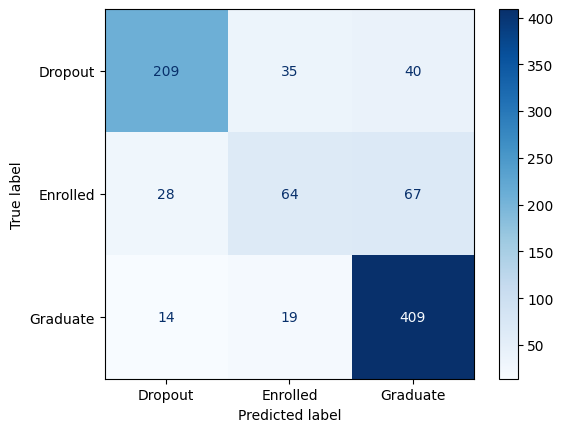

In [85]:
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=['Dropout', 'Enrolled', 'Graduate'],cmap=plt.cm.Blues)

In [86]:
predict=clf_xgb.predict(X_test)
confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       284
           1       0.54      0.40      0.46       159
           2       0.79      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885

Accuracy:  0.7706214689265537


In [87]:
(503/(20+29+503)+79/(79+80+40)+249/(249+43+63))/3

0.6698750864617707

In [88]:
params_grid={
    'max_depth':[3,4,5],
    'learning_rate':[0.1,0.01,0.05],
    'gamma':[0,0.25,1.0],
    'reg_lambda':[0,1.0,10.0]
    #'scale_pos_weight':[1,3,5]
}
grid_search=GridSearchCV(clf_xgb, param_grid=params_grid, scoring='roc_auc', n_jobs=10, cv=3, verbose=2)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters found: ", best_params)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\p0pp1\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 0}


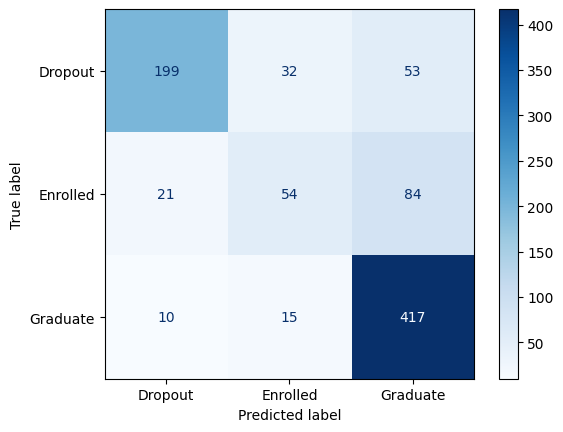

In [89]:
ConfusionMatrixDisplay.from_estimator(grid_search,X_test,y_test,display_labels=['Dropout', 'Enrolled', 'Graduate'],cmap=plt.cm.Blues)

In [90]:
predict=grid_search.predict(X_test)
confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77       284
           1       0.53      0.34      0.42       159
           2       0.75      0.94      0.84       442

    accuracy                           0.76       885
   macro avg       0.72      0.66      0.68       885
weighted avg       0.75      0.76      0.74       885

Accuracy:  0.7570621468926554


## Bellow has good results

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'gamma': 0.25, 'learning_rate': 0.2, 'max_depth': 5, 'reg_lambda': 6.0}
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       284
           1       0.57      0.45      0.51       159
           2       0.79      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.74      0.70      0.71       885
weighted avg       0.77      0.77      0.76       885

Accuracy:  0.7728813559322034


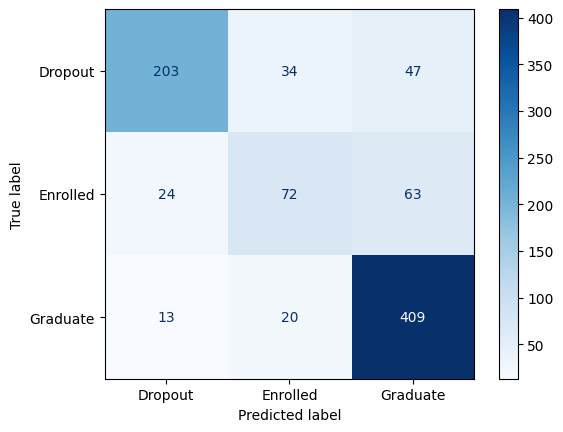

In [91]:
params_grid={
    'max_depth':[5],
    'learning_rate':[0.2],
    'gamma':[0.25],
    'reg_lambda':[6.0,7.0],
}
grid_search=GridSearchCV(clf_xgb, param_grid=params_grid, scoring='recall_macro', n_jobs=10, cv=3, verbose=2)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters found: ", best_params)
predict=grid_search.predict(X_test)
confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))
ConfusionMatrixDisplay.from_estimator(grid_search,X_test,y_test,display_labels=['Dropout', 'Enrolled', 'Graduate'],cmap=plt.cm.Blues)

In [ ]:
classes = np.unique(y_train)
weights=cw.compute_sample_weight('balanced',y=y_train)   
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)],sample_weight=weights)
predict=clf_xgb.predict(X_test)
confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=['Dropout', 'Enrolled', 'Graduate'],cmap=plt.cm.Blues)

In [ ]:
classes = np.unique(y_train)
weights_dic={0:.9,1:2.1,2:.8}
weights=cw.compute_sample_weight(weights_dic,y=y_train)   
clf_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)],sample_weight=weights)
predict=clf_xgb.predict(X_test)
confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=['Dropout', 'Enrolled', 'Graduate'],cmap=plt.cm.Blues)

In [ ]:
weights_dic={0:1,1:1,2:.3}
weights=cw.compute_sample_weight(weights_dic,y=y_train)   
params_grid={
    'max_depth':[5],
    'learning_rate':[.2],
    'gamma':[0.9],
    'reg_lambda':[10.0],
}
grid_search=GridSearchCV(clf_xgb, param_grid=params_grid, scoring='recall_weighted', n_jobs=10, cv=3, verbose=0)
grid_search.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)],sample_weight=weights)
best_params = grid_search.best_params_
#print("Best parameters found: ", best_params)
predict=grid_search.predict(X_test)
confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))
ConfusionMatrixDisplay.from_estimator(grid_search,X_test,y_test,display_labels=['Dropout', 'Enrolled', 'Graduate'],cmap=plt.cm.Blues)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
clf_smote = LogisticRegression().fit(X_resampled, y_resampled)
X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))
clf_adasyn = LogisticRegression().fit(X_resampled, y_resampled)

In [ ]:
clf_xgb=xgb.XGBClassifier(objective='multi:softprob',random_state=1)
clf_xgb.fit(X_resampled,y_resampled,verbose=True,early_stopping_rounds=500,eval_metric='aucpr',eval_set=[(X_test,y_test)])

In [ ]:
predict=clf_xgb.predict(X_test)
confusion_matrix(y_test, predict)
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))
ConfusionMatrixDisplay.from_estimator(clf_xgb,X_test,y_test,display_labels=['Dropout', 'Enrolled', 'Graduate'],cmap=plt.cm.Blues)

In [ ]:
params_grid={
    'max_depth':[7,8],
    'learning_rate':[.2],
    'gamma':[0.25],
    'reg_lambda':[5.0],
    'subsample':[.4,.5,.7]
}
grid_clf = GridSearchCV(estimator=xgb.XGBClassifier(eval_metric='aucpr',device='cuda',tree_method='hist',objective='multi:softprob',random_state=1), param_grid=params_grid, scoring='f1_macro', cv=5)
#grid_clf.fit(X_resampled, y_resampled)
# Step 2: Train with the best parameters and early stopping
best_params = grid_clf.best_params_
#clf_xgb = xgb.XGBClassifier(**best_params, eval_metric='aucpr',device='cuda',tree_method='hist',objective='multi:softprob',random_state=1)
#clf_xgb.fit(X_resampled, y_resampled, verbose=True, early_stopping_rounds=10, eval_set=[(X_test, y_test)])
# Parameters must include 'tree_method': 'gpu_hist' for using GPU
best_params['tree_method'] = 'gpu_hist'
best_params['eval_metric'] = 'aucpr'
best_params['objective'] = 'multi:softprob'
best_params['random_state'] = 1
clf_xgb = xgb.train(dtrain, evals=[(dtest, 'test')], early_stopping_rounds=10,params=best_params)

In [ ]:
print(best_params)
#{'gamma': 0.25, 'learning_rate': 0.2, 'max_depth': 7, 'reg_lambda': 5.0, 'subsample': 0.5}

In [ ]:
best_params = {'gamma': 0.25, 'learning_rate': 0.2, 'max_depth': 8, 'reg_lambda': 5.0, 'subsample': 0.4} #grid_clf.best_params_

# Since you're using XGBoost's learning API, you need to specify the parameters correctly
best_params['tree_method'] = 'hist'
best_params['eval_metric'] = 'aucpr'
best_params['objective'] = 'multi:softprob'
best_params['random_state'] = 1
best_params['num_class'] = 3
best_params['device'] = 'cuda' 
# Create DMatrix for train and test sets
dtrain = xgb.DMatrix(X_resampled, label=y_resampled)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
clf_xgb = xgb.train(params=best_params, dtrain=dtrain, evals=[(dtest, 'test')], num_boost_round=100, early_stopping_rounds=10)

In [ ]:
# Predict the probabilities
y_pred_proba = clf_xgb.predict(dtest)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
# Create confusion matrix
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Dropout', 'Enrolled', 'Graduate'], cmap=plt.cm.Blues)
cmd

In [ ]:
weights_dic={0:1,1:1.4,2:.7}
weights=class_weight.compute_sample_weight(weights_dic,y=y_resampled)   
# Convert your data to DMatrix format
dtrain = xgb.DMatrix(X_resampled, label=y_resampled, nthread=-1, weight=weights)
clf_xgb = xgb.train(params=best_params, dtrain=dtrain, evals=[(dtest, 'test')], num_boost_round=100, early_stopping_rounds=10)
# Predict the probabilities
y_pred_proba = clf_xgb.predict(dtest)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
# Create confusion matrix
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Dropout', 'Enrolled', 'Graduate'], cmap=plt.cm.Blues)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import class_weight
from imblearn.pipeline import Pipeline as ImbPipeline

import xgboost as xgb

# Split your data

# Define a range of weights to try for each class
weight_options = {
    'class_0': [0.25, .5, 1],
    'class_1': [1, 1.5, 2],
    'class_2': [0.25, .5, 1]
}

# Define the hyperparameters for the grid search
params_grid={
    'max_depth':[8],
    'learning_rate':[.2],
    'gamma':[0.25],
    'reg_lambda':[5.0],
    'subsample':[.4,.5,.7]
}

# Initialize your classifier
xgb_clf = xgb.XGBClassifier(eval_metric='aucpr',device='cuda',tree_method='hist',objective='multi:softprob',random_state=1)

# Initialize GridSearchCV
pipeline = ImbPipeline([
    ('smote', SMOTE()),
    ('classifier', xgb_clf)
])  

best_f1_score = 0
best_weights = None
best_params = None

# Iterate over all combinations of weights
for w0 in weight_options['class_0']:
    for w1 in weight_options['class_1']:
        for w2 in weight_options['class_2']:
            # Compute sample weights
            weights = class_weight.compute_sample_weight({0: w0, 1: w1, 2: w2}, y=y_resampled)

            # Create DMatrix with weights
            dtrain = xgb.DMatrix(X_resampled, label=y_resampled, weight=weights)
            dtest = xgb.DMatrix(X_test, label=y_test)

            # Fit the grid search
            grid_search = GridSearchCV(estimator=pipeline, param_grid=params_grid, scoring='f1_macro', cv=3)
            grid_search.fit(X_resampled, y_resampled, sample_weight=weights)

            # Evaluate performance
            if grid_search.best_score_ > best_f1_score:
                best_f1_score = grid_search.best_score_
                best_weights = (w0, w1, w2)
                best_params = grid_search.best_params_

# Output the best weights and parameters found
print(f"Best F1 Score: {best_f1_score}")
print(f"Best Weights: {best_weights}")
print(f"Best Parameters: {best_params}")


In [ ]:
y_pred_proba = clf_xgb.predict(dtest)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
# Create confusion matrix
cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Dropout', 'Enrolled', 'Graduate'], cmap=plt.cm.Blues)

In [ ]:
from sklearn.utils import class_weight
# Initialize GridSearchCV


best_f1_score = 0
best_weights = None
best_params = None
weights = class_weight.compute_sample_weight({0: 1, 1: 1.5, 2: 1}, y=y_resampled)
params_grid={
    'max_depth':[8],
    'learning_rate':[.2],
    'gamma':[0.25],
    'reg_lambda':[5.0],
    'subsample':[.4,.5,.7]
}
xgb_clf = xgb.XGBClassifier(eval_metric='aucpr',device='cuda',tree_method='hist',objective='multi:softprob',random_state=1)
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=params_grid, scoring='f1_macro', cv=3)
grid_search.fit(X_resampled, y_resampled, sample_weight=weights)
if grid_search.best_score_ > best_f1_score:
                best_f1_score = grid_search.best_score_
                best_params = grid_search.best_params_

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)
ssmote=SMOTE(random_state=1)
X_resampled, y_resampled=ssmote.fit_resample(X_train, y_train)
# Define a range of weights to try for each class
weight_options = {
    'class_0': [0.25, .5, 1],
    'class_1': [1, 1.5, 2],
    'class_2': [0.25, .5, 1]
}
weight_combinations=[]
for w0 in weight_options['class_0']:
    for w1 in weight_options['class_1']:
        for w2 in weight_options['class_2']:
            dic={}
            dic[0]=w0
            dic[1]=w1
            dic[2]=w2
            weight_combinations.append(dic)
# Define the hyperparameters for the grid search
params_grid = {
    'classifier__max_depth': [8],
    'classifier__learning_rate': [0.2],
    'classifier__gamma': [0.25],
    'classifier__reg_lambda': [5.0],
    'classifier__subsample': [0.4, 0.5, 0.7]
}

# Initialize your classifier
xgb_clf = xgb.XGBClassifier(eval_metric='aucpr', tree_method='hist', objective='multi:softprob', random_state=1)

# Initialize the pipeline
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=1)),
    ('classifier', xgb_clf)
])

best_f1_score = 0
best_weights = None
best_params = None

# Iterate over all combinations of weights
for weights in weight_combinations:
    # Perform the grid search
    grid_search = GridSearchCV(estimator=pipeline, param_grid=params_grid, scoring='f1_macro', cv=3)
    grid_search.fit(X_train, y_train, classifier__sample_weight=class_weight.compute_sample_weight(weights, y_resampled))

    # Evaluate performance
    if grid_search.best_score_ > best_f1_score:
        best_f1_score = grid_search.best_score_
        best_weights = weights
        best_params = grid_search.best_params_

# Output the best weights and parameters found
print(f"Best F1 Score: {best_f1_score}")
print(f"Best Weights: {best_weights}")
print(f"Best Parameters: {best_params}")


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb

# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, stratify=y)

# Define a range of weights to try for each class
weight_options = {
    'class_0': [0.25, .5, 1],
    'class_1': [1, 1.5, 2],
    'class_2': [0.25, .5, 1]
}
weight_combinations=[]
for w0 in weight_options['class_0']:
    for w1 in weight_options['class_1']:
        for w2 in weight_options['class_2']:
            dic={}
            dic[0]=w0
            dic[1]=w1
            dic[2]=w2
            weight_combinations.append(dic)
# Define the hyperparameters for the grid search
params_grid = {
    'classifier__max_depth': [8],
    'classifier__learning_rate': [0.2],
    'classifier__gamma': [0.25],
    'classifier__reg_lambda': [5.0],
    'classifier__subsample': [0.4, 0.5, 0.7]
}

# Initialize your classifier
xgb_clf = xgb.XGBClassifier(eval_metric='aucpr', tree_method='hist', objective='multi:softprob', random_state=1)

best_f1_score = 0
best_weights = None
best_params = None

# Iterate over all combinations of weights
for weights in weight_combinations:
    # Apply SMOTE to the training data
    smote = SMOTE(sampling_strategy=weights, random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    
    # Compute sample weights for the resampled data
    sample_weights = class_weight.compute_sample_weight('balanced', y_resampled)

    # Create the pipeline
    pipeline = ImbPipeline([
        ('classifier', xgb_clf)
    ])
    
    # Perform the grid search
    grid_search = GridSearchCV(estimator=pipeline, param_grid=params_grid, scoring='f1_macro', cv=3)
    grid_search.fit(X_resampled, y_resampled, classifier__sample_weight=sample_weights)

    # Evaluate performance
    if grid_search.best_score_ > best_f1_score:
        best_f1_score = grid_search.best_score_
        best_weights = weights
        best_params = grid_search.best_params_

# Output the best weights and parameters found
print(f"Best F1 Score: {best_f1_score}")
print(f"Best Weights: {best_weights}")
print(f"Best Parameters: {best_params}")


In [ ]:
weight_options = {
    'class_0': [.2,.3,.4,.5,.6,.7,.8,.9,1],
    'class_1': [1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2],
    'class_2': [.2,.3,.4,.5,.6,.7,.8,.9,1]
}
weight_combinations=[]
for w0 in weight_options['class_0']:
    for w1 in weight_options['class_1']:
        for w2 in weight_options['class_2']:
            dic={}
            dic[0]=w0
            dic[1]=w1
            dic[2]=w2
            weight_combinations.append(dic)
weight_combinations

In [ ]:
best_f1_score=0
for weights in weight_combinations:
    best_params = {'gamma': 0.25, 'learning_rate': 0.2, 'max_depth': 8, 'reg_lambda': 5.0, 'subsample': 0.4} #grid_clf.best_params_

    # Since you're using XGBoost's learning API, you need to specify the parameters correctly
    best_params['tree_method'] = 'hist'
    best_params['eval_metric'] = 'aucpr'
    best_params['objective'] = 'multi:softprob'
    best_params['random_state'] = 1
    best_params['num_class'] = 3
    best_params['device'] = 'cuda' 
    # Create DMatrix for train and test sets
    weight = class_weight.compute_sample_weight(weights, y=y_resampled)
    dtrain = xgb.DMatrix(X_resampled, label=y_resampled,weight=weight)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Train the model
    clf_xgb = xgb.train(params=best_params, dtrain=dtrain, evals=[(dtest, 'test')], num_boost_round=100, early_stopping_rounds=10)

    y_pred_proba = clf_xgb.predict(dtest)

# Convert probabilities to class labels
    predict = np.argmax(y_pred_proba, axis=1)
    # Get the precision, recall, f1-score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predict)

    # Find the index of the smallest f1 score
    min_index = f1_score.argmin()

    # Print the smallest f1 score
    if f1_score[min_index]>best_f1_score:
        best_weights=weights
        best_f1_score=f1_score[min_index]
        best_f1_score


In [ ]:
print(best_f1_score)
print(best_weights)

In [ ]:
best_params = {'gamma': 0.25, 'learning_rate': 0.2, 'max_depth': 8, 'reg_lambda': 5.0, 'subsample': 0.4} #grid_clf.best_params_

# Since you're using XGBoost's learning API, you need to specify the parameters correctly
best_params['tree_method'] = 'hist'
best_params['eval_metric'] = 'aucpr'
best_params['objective'] = 'multi:softprob'
best_params['random_state'] = 1
best_params['num_class'] = 3
best_params['device'] = 'cuda' 
# Create DMatrix for train and test sets
weight = class_weight.compute_sample_weight(best_weights, y=y_resampled)
dtrain = xgb.DMatrix(X_resampled, label=y_resampled,weight=weight)
dtest = xgb.DMatrix(X_test, label=y_test)

# Train the model
clf_xgb = xgb.train(params=best_params, dtrain=dtrain, evals=[(dtest, 'test')], num_boost_round=100, early_stopping_rounds=10)

y_pred_proba = clf_xgb.predict(dtest)

# Convert probabilities to class labels
predict = np.argmax(y_pred_proba, axis=1)

In [ ]:
print(classification_report(y_test, predict))
print("Accuracy: ", accuracy_score(y_test, predict))
# Create confusion matrix
cmd = ConfusionMatrixDisplay.from_predictions(y_test, predict, display_labels=['Dropout', 'Enrolled', 'Graduate'], cmap=plt.cm.Blues)

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predict)
f1_score[2]

In [ ]:
best_params = {'gamma': 0.25, 'learning_rate': 0.2, 'max_depth': 8, 'reg_lambda': 5.0, 'subsample': 0.4} #grid_clf.best_params_
best_params['tree_method'] = 'hist'
best_params['eval_metric'] = 'aucpr'
best_params['objective'] = 'multi:softprob'
best_params['random_state'] = 1
best_params['num_class'] = 3
best_params['device'] = 'cuda' 

In [ ]:
def weight_optimizer(weight_combinations,best_params = {},best_weights = None,best_f1_score=0):
    for weights in weight_combinations:
        # Create DMatrix for train and test sets
        weight = class_weight.compute_sample_weight(weights, y=y_resampled)
        dtrain = xgb.DMatrix(X_resampled, label=y_resampled,weight=weight)
        dtest = xgb.DMatrix(X_test, label=y_test)
        # default params
        best_params['tree_method'] = 'hist'
        best_params['eval_metric'] = 'aucpr'
        best_params['objective'] = 'multi:softprob'
        best_params['random_state'] = 1
        best_params['num_class'] = 3
        best_params['device'] = 'cuda' 
        # Train the model
        clf_xgb = xgb.train(params=best_params, dtrain=dtrain, evals=[(dtest, 'test')], num_boost_round=100, early_stopping_rounds=10)

        y_pred_proba = clf_xgb.predict(dtest)

        # Convert probabilities to class labels
        predict = np.argmax(y_pred_proba, axis=1)
        # Get the precision, recall, f1-score, and support
        precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predict)

        # Find the index of the smallest f1 score
        min_index = f1_score.argmin()

        # Print the smallest f1 score
        if f1_score[min_index]>best_f1_score:
            best_weights=weights
            best_f1_score=f1_score[min_index]
            best_f1_score
            best_report=classification_report(y_test, predict)
    print(best_f1_score)
    print(best_weights)
    print(best_report)
    return best_weights

In [130]:
def hyperparameter_optimizer(estimator,param_grid,scoring,n_jobs=-1,cv=3,verbose=2,sample_weight=None,n_iter=125):
    weights = class_weight.compute_sample_weight(sample_weight, y=y_resampled)
    rand_search=RandomizedSearchCV(estimator=estimator, param_distributions=param_grid, scoring=scoring, n_jobs=n_jobs, cv=cv, verbose=verbose,n_iter=n_iter)
    rand_search.fit(X_resampled,y_resampled,sample_weight=weights)
    best_params = rand_search.best_params_
    return best_params

In [131]:
def model_rating(model,params,ranking=None,weight={0:1,1:1,2:1}):    
    if ranking!=None:
        id=sorted(ranking, key=lambda x: x['id'], reverse=True)[0]['id']+1
    if ranking==None:
        ranking=[]
        id=1
    try:
        y_pred_proba = model.predict(dtest)
    except: 
        weights = class_weight.compute_sample_weight(weight, y=y_resampled)
        dtrain = xgb.DMatrix(X_resampled, label=y_resampled,weight=weights)
        dtest = xgb.DMatrix(X_test, label=y_test)
        # Train the model
        params['tree_method'] = 'hist'
        params['eval_metric'] = 'aucpr'
        params['objective'] = 'multi:softprob'
        params['random_state'] = 1
        params['num_class'] = 3
        params['device'] = 'cuda' 
        model = xgb.train(params=params, dtrain=dtrain, evals=[(dtest, 'test')], num_boost_round=100, early_stopping_rounds=10)
        y_pred_proba = model.predict(dtest)

    # Convert probabilities to class labels
    predict = np.argmax(y_pred_proba, axis=1)
    # Get the precision, recall, f1-score, and support
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, predict)

    # Find the index of the smallest f1 score
    min_f1 = f1_score.argmin()
    min_recall = recall.argmin()
    min_precision = precision.argmin()
    full_report=classification_report(y_test, predict)
    entry= {'id':id,'weights':weight,'parameters':params,'f1':f1_score[min_f1],'recall':recall[min_recall],'precision':precision[min_precision],'full_report':full_report}
    ranking.append(entry)
    best_f1_score = sorted(ranking, key=lambda x: x['f1'], reverse=True)
    best_recall = sorted(ranking, key=lambda x: x['recall'], reverse=True)
    best_precision = sorted(ranking, key=lambda x: x['precision'], reverse=True)
    print('The best f1: ',best_f1_score[0])
    print('The best recall: ',best_recall[0])    
    print('The best precision: ',best_precision[0])  
    return ranking, best_f1_score[0]['f1'], best_recall[0]['recall'], best_precision[0]['precision']

In [115]:
params={}
params['tree_method'] = 'hist'
params['eval_metric'] = 'aucpr'
params['objective'] = 'multi:softprob'
params['random_state'] = 1
params['num_class'] = 3
params['device'] = 'cuda'
model = xgb.train(params=params, dtrain=dtrain, evals=[(dtest, 'test')], num_boost_round=100, early_stopping_rounds=10)
y_pred_proba = model.predict(dtest)

# Convert probabilities to class labels
predict = np.argmax(y_pred_proba, axis=1)

print(classification_report(y_test, predict))

[0]	test-aucpr:0.69445
[1]	test-aucpr:0.70441
[2]	test-aucpr:0.71350
[3]	test-aucpr:0.71586
[4]	test-aucpr:0.71749
[5]	test-aucpr:0.72488
[6]	test-aucpr:0.72401
[7]	test-aucpr:0.72258
[8]	test-aucpr:0.72875
[9]	test-aucpr:0.73056
[10]	test-aucpr:0.73273
[11]	test-aucpr:0.73144
[12]	test-aucpr:0.73614
[13]	test-aucpr:0.73866
[14]	test-aucpr:0.74190
[15]	test-aucpr:0.74304
[16]	test-aucpr:0.74490
[17]	test-aucpr:0.74573
[18]	test-aucpr:0.74838
[19]	test-aucpr:0.74734
[20]	test-aucpr:0.74891
[21]	test-aucpr:0.74964
[22]	test-aucpr:0.74922
[23]	test-aucpr:0.75050
[24]	test-aucpr:0.75009
[25]	test-aucpr:0.75242
[26]	test-aucpr:0.75302
[27]	test-aucpr:0.75315
[28]	test-aucpr:0.75328
[29]	test-aucpr:0.75551
[30]	test-aucpr:0.75480
[31]	test-aucpr:0.75590
[32]	test-aucpr:0.75613
[33]	test-aucpr:0.75397
[34]	test-aucpr:0.75379
[35]	test-aucpr:0.75430
[36]	test-aucpr:0.75535
[37]	test-aucpr:0.75622
[38]	test-aucpr:0.75665
[39]	test-aucpr:0.75784
[40]	test-aucpr:0.75829
[41]	test-aucpr:0.75782
[4

In [132]:
params = {'gamma': uniform(0,.5), 'learning_rate': uniform(.1,.2), 'max_depth': randint(3,7), 'reg_lambda': randint(1,10), 'subsample': uniform(.2,.7)}

In [69]:
model=xgb.XGBClassifier(eval_metric='aucpr', tree_method='hist', objective='multi:softprob', random_state=1)
best_params = hyperparameter_optimizer(model,param_grid=params,scoring='f1_weighted')
best_weights = weight_optimizer([{0:.9,1:1.7,2:1}],best_params=best_params)
improvement_threshold = 0.01  # Minimum improvement to continue optimization
previous_best_score = 0
ranking, best_f1_score, best_recall, best_precision = model_rating('x',params=best_params,weight=best_weights)
current_best_score = best_f1_score
for i in range(0,10):
    while current_best_score - previous_best_score > improvement_threshold:
        previous_best_score = current_best_score
        # Refine hyperparameters with current best weights
        best_params = hyperparameter_optimizer(model,param_grid=params,scoring='f1_weighted',sample_weight=best_weights)

        # Refine weights with current best hyperparameters
        best_weights = best_weights = weight_optimizer(weight_combinations,best_params=best_params)

        # Evaluate the model with the new hyperparameters and weights
        ranking, best_f1_score, best_recall, best_precision = model_rating('x',params=best_params,weight=best_weights,ranking=ranking)
        current_best_score = best_f1_score
    # Final evaluation with the test set


[14]	test-aucpr:0.73664
[15]	test-aucpr:0.73736
[16]	test-aucpr:0.74155
[17]	test-aucpr:0.74217
[18]	test-aucpr:0.74474
[19]	test-aucpr:0.74406
[20]	test-aucpr:0.74397
[21]	test-aucpr:0.74241
[22]	test-aucpr:0.74344
[23]	test-aucpr:0.74015
[24]	test-aucpr:0.74026
[25]	test-aucpr:0.74114
[26]	test-aucpr:0.74053
[27]	test-aucpr:0.74048
[28]	test-aucpr:0.74054
[0]	test-aucpr:0.67637
[1]	test-aucpr:0.69514
[2]	test-aucpr:0.70321
[3]	test-aucpr:0.70725
[4]	test-aucpr:0.70943
[5]	test-aucpr:0.71171
[6]	test-aucpr:0.71439
[7]	test-aucpr:0.72284
[8]	test-aucpr:0.72669
[9]	test-aucpr:0.72959
[10]	test-aucpr:0.73095
[11]	test-aucpr:0.73639
[12]	test-aucpr:0.73961
[13]	test-aucpr:0.73924
[14]	test-aucpr:0.74483
[15]	test-aucpr:0.74777
[16]	test-aucpr:0.75178
[17]	test-aucpr:0.74951
[18]	test-aucpr:0.74673
[19]	test-aucpr:0.74761
[20]	test-aucpr:0.74451
[21]	test-aucpr:0.74583
[22]	test-aucpr:0.74486
[23]	test-aucpr:0.74622
[24]	test-aucpr:0.74717
[25]	test-aucpr:0.74841
[26]	test-aucpr:0.74883
[0

In [133]:
model=xgb.XGBClassifier(eval_metric='aucpr', tree_method='hist', objective='multi:softprob', random_state=1)
improvement_threshold = 0.001
previous_best_score=0
for i in range(0,10):
    while current_best_score - previous_best_score > improvement_threshold:
        previous_best_score = current_best_score
        # Refine hyperparameters with current best weights
        best_params = hyperparameter_optimizer(model,param_grid=params,scoring='f1_weighted',sample_weight=best_weights)

        # Refine weights with current best hyperparameters
        best_weights = best_weights = weight_optimizer(weight_combinations,best_params=best_params)

        # Evaluate the model with the new hyperparameters and weights
        ranking, best_f1_score, best_recall, best_precision = model_rating(model,params=best_params,weight=best_weights,ranking=ranking)
        current_best_score = best_f1_score
    # Final evaluation with the test set

Fitting 3 folds for each of 125 candidates, totalling 375 fits
[0]	test-aucpr:0.66518
[1]	test-aucpr:0.67534
[2]	test-aucpr:0.68001
[3]	test-aucpr:0.68881
[4]	test-aucpr:0.69367
[5]	test-aucpr:0.69834
[6]	test-aucpr:0.70105
[7]	test-aucpr:0.70573
[8]	test-aucpr:0.70986
[9]	test-aucpr:0.71534
[10]	test-aucpr:0.71950
[11]	test-aucpr:0.72322
[12]	test-aucpr:0.72780
[13]	test-aucpr:0.72639
[14]	test-aucpr:0.72470
[15]	test-aucpr:0.72606
[16]	test-aucpr:0.72905
[17]	test-aucpr:0.72945
[18]	test-aucpr:0.72931
[19]	test-aucpr:0.73384
[20]	test-aucpr:0.73598
[21]	test-aucpr:0.73638
[22]	test-aucpr:0.73603
[23]	test-aucpr:0.73775
[24]	test-aucpr:0.73890
[25]	test-aucpr:0.73763
[26]	test-aucpr:0.73802
[27]	test-aucpr:0.73699
[28]	test-aucpr:0.73825
[29]	test-aucpr:0.73834
[30]	test-aucpr:0.73937
[31]	test-aucpr:0.73987
[32]	test-aucpr:0.74038
[33]	test-aucpr:0.74096
[34]	test-aucpr:0.74143
[35]	test-aucpr:0.74228
[36]	test-aucpr:0.74237
[37]	test-aucpr:0.74417
[38]	test-aucpr:0.74562
[39]	test-a

In [139]:
print(sorted(ranking, key=lambda x: x['f1'], reverse=True)[0]['full_report'])
print(sorted(ranking, key=lambda x: x['recall'], reverse=True)[0]['we'])
print(sorted(ranking, key=lambda x: x['precision'], reverse=True)[0]['full_report'])

              precision    recall  f1-score   support

           0       0.94      0.60      0.74       284
           1       0.48      0.66      0.56       159
           2       0.82      0.90      0.86       442

    accuracy                           0.76       885
   macro avg       0.75      0.72      0.72       885
weighted avg       0.80      0.76      0.76       885

              precision    recall  f1-score   support

           0       0.84      0.71      0.77       284
           1       0.49      0.65      0.56       159
           2       0.85      0.84      0.84       442

    accuracy                           0.76       885
   macro avg       0.73      0.73      0.72       885
weighted avg       0.78      0.76      0.77       885

              precision    recall  f1-score   support

           0       0.92      0.62      0.74       284
           1       0.50      0.62      0.55       159
           2       0.81      0.91      0.86       442

    accuracy        